In [1]:
%matplotlib inline
import sqlite3
import pandas as pd
import networkx as nx

In [39]:
papers = []
authors = []
conn = sqlite3.connect('hw1.sqlite',timeout=10)
for row in conn.execute('SELECT * FROM paper'):
    papers.append({'id':row[0],'paper_name':row[1]})
conn.close()

conn = sqlite3.connect('hw1.sqlite',timeout=10)
for row in conn.execute('SELECT * FROM paper'):
    authors.append({'id':row[0],'author_name':row[1]})
conn.close()

In [28]:
# Cria lista de arestas para rede de autores
query_pair_authors = """
SELECT paper_id,
       a1.author_id AS author1,
       a2.author_id AS author2
FROM author_paper AS a1
JOIN author_paper AS a2 USING (paper_id)
WHERE a1.author_id < a2.author_id;
"""
conn = sqlite3.connect('hw1.sqlite')
edges_authors = []
for row in conn.execute(query_pair_authors):
    edges_authors.append(row)
conn.close()
edges_authors= pd.DataFrame(edges_authors,columns=['paper','author1','author2'])

# Cria lista de arestas para rede de papers
query_pair_papers = """
SELECT author_id,
       a1.paper_id AS paper1,
       a2.paper_id AS paper2
FROM author_paper AS a1
JOIN author_paper AS a2 USING (author_id)
WHERE a1.paper_id < a2.paper_id;
"""
conn = sqlite3.connect('hw1.sqlite')
edges_papers = []
for row in conn.execute(query_pair_papers):
    edges_papers.append(row)
conn.close()
edges_papers = pd.DataFrame(edges_papers,columns=['author','paper1','paper2'])


count_authors = edges_authors.groupby(['author1','author2']).count().reset_index()
count_papers  = edges_papers.groupby(['paper1','paper2']).count().reset_index()

In [40]:
G_authors = nx.Graph()
G_papers = nx.Graph()

for d in authors: 
    node_id = d.pop('id')
    G_authors.add_node(node_id, **d) 
    
for d in papers: 
    node_id = d.pop('id')
    G_papers.add_node(node_id, **d) 

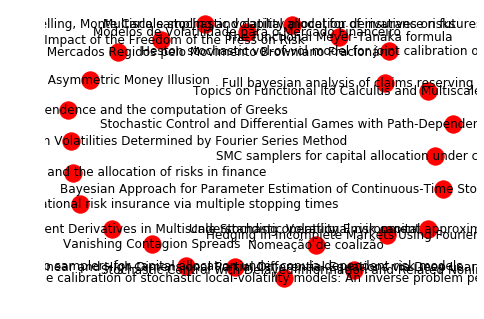

In [47]:
plt.figure(figsize=(12,1))
labels=dict((n,d['author_name']) for n,d in G_authors.nodes(data=True))
nx.draw_spring(G_authors,labels=labels,with_labels=True)